In [1]:
import numpy as np
import warnings
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
from yahoo_fin import stock_info as si
import pandas as pd

from datetime import datetime
from dateutil.relativedelta import relativedelta

import tools
import importlib
importlib.reload(tools)

pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")
yf.pdr_override()

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


/home/ec2-user/anaconda3/envs/slacktrading/lib/python3.7/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


### Download data from AWS S3

In [2]:
s3_bucket = 'slack-trading'
local_path = '../data'
tools.download_data_from_s3(s3_bucket, local_path)

In [3]:
num_of_years = 1
start = dt.date.today() - dt.timedelta(days = int(365.25*num_of_years))
end = dt.date.today()

In [4]:
# df = pd.read_csv('data/mktcap.csv', index_col=0)
# df = df[df['mktcap']>0]
#
# Use csv file from China
# df = pd.read_csv('../data/hk_stock_full.csv', header=None)
df = pd.read_csv('../data/clean_hk_stock.csv', header=None)
df = df.rename(columns={0: 'stock'})

In [5]:
df

,stock
0,0001.HK
1,0002.HK
2,0003.HK
3,0004.HK
4,0005.HK
5,0006.HK
6,0007.HK
7,0008.HK
8,0010.HK
9,0011.HK


In [6]:
def stock_begin_timegap(stock):
    num_of_years = 1
    start = dt.date.today() - dt.timedelta(days = int(365.25*num_of_years))
    try:
        df = yf.download(stock, start=start)
        stock_start = df.index[0]
        coeff_var = df['Close'].std() / df['Close'].mean()
        return np.array(((stock_start - pd.to_datetime(start)).days, coeff_var))
    except:
        return np.array((10000, 10000))

In [7]:
%%time
df['gap'], df['coeff_var'] = zip(*df['stock'].apply(stock_begin_timegap))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 0198.HK: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [8]:
df

,stock,gap,coeff_var
0,0001.HK,2.0,0.159634
1,0002.HK,2.0,0.053772
2,0003.HK,2.0,0.103212
3,0004.HK,2.0,0.150518
4,0005.HK,2.0,0.232011
5,0006.HK,2.0,0.131955
6,0007.HK,2.0,0.397609
7,0008.HK,2.0,0.043379
8,0010.HK,2.0,0.082989
9,0011.HK,2.0,0.117932


In [9]:
stock_df = df[(df['gap']<=5) & (df['coeff_var']<1000)]

In [10]:
stock_df.count()

stock        1252
gap          1252
coeff_var    1252
dtype: int64

In [11]:
stock_df.describe()

,gap,coeff_var
count,1252.000000,1252.000000
mean,2.005591,0.181337
std,0.116438,0.137633
min,2.000000,0.000000
25%,2.000000,0.101150
50%,2.000000,0.147187
75%,2.000000,0.213589
max,5.000000,1.231203


In [12]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 0 to 1272
Data columns (total 3 columns):
stock        1252 non-null object
gap          1252 non-null float64
coeff_var    1252 non-null float64
dtypes: float64(2), object(1)
memory usage: 39.1+ KB


In [13]:
### stock_df = stock_df[stock_df['coeff_var']<=stock_df['coeff_var'].mean()]

In [14]:
stock_df.to_csv('../data/stock_qualified.csv')

### Find correlation

In [15]:
stock_df = pd.read_csv('../data/stock_qualified.csv', index_col=0)

In [16]:
%%time
tickers = stock_df['stock'].to_list()
dataset = pdr.get_data_yahoo(tickers, start, end)['Adj Close']

[*********************100%***********************]  1252 of 1252 completed
CPU times: user 57.9 s, sys: 2.53 s, total: 1min
Wall time: 4min 32s


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2019-12-16 to 2020-12-11
Columns: 1252 entries, 0001.HK to 9988.HK
dtypes: float64(1252)
memory usage: 2.4 MB


In [18]:
dataset.to_csv('../data/all_stock_close.csv')

In [19]:
dataset.head(3)

,0001.HK,0002.HK,0003.HK,0004.HK,0005.HK,0006.HK,0007.HK,0008.HK,0010.HK,0011.HK,...,6869.HK,6878.HK,6881.HK,6886.HK,6889.HK,6890.HK,6893.HK,6896.HK,9966.HK,9988.HK
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-16,70.805084,78.262993,14.043065,18.738298,59.773380,53.938763,0.83,4.333531,18.881948,154.165756,...,13.875873,0.445,4.198518,12.635106,9.711697,1.0494,0.69,1.092857,15.10,201.000000
2019-12-17,71.468147,77.836632,14.098603,18.934509,60.470737,53.750168,0.83,4.342871,18.842936,155.884018,...,13.875873,0.440,4.383175,13.122571,9.711697,1.0494,0.69,1.102041,14.68,203.800003
2019-12-18,70.094666,78.641998,14.006008,18.993374,60.371113,53.561569,0.83,4.361549,18.803925,154.929428,...,13.602648,0.435,4.383175,13.083574,9.673908,1.0395,0.72,1.083673,14.00,202.600006


### Use close on all stocks to compile result

In [20]:
dataset = pd.read_csv('../data/all_stock_close.csv')
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date', drop=True, inplace=True)

### analyze shift

In [ ]:
dataset['0001.HK'].head(5)

In [ ]:
dataset['0001.HK'].shift(1).head(5)

In [ ]:
dataset['0001.HK'].shift(2).head(5)

In [ ]:
print('Rise {}  Drop {}  NoChange {}'.format(np.log(0.9), np.log(1.1), np.log(1)))

### prevday and today

In [21]:
prevday_returns = np.log(dataset.shift(1)/dataset.shift(2))
today_returns = np.log(dataset/dataset.shift(1))

In [22]:
stocks_prev = prevday_returns.columns.to_list()
stocks_today = today_returns.columns.to_list()

In [23]:
new_col = ['{}.prev'.format(c) for c in stocks_prev]
prevday_returns.columns = new_col

In [24]:
comb_df = pd.concat([prevday_returns, today_returns], axis=1)

In [25]:
%%time
print('\nCorrelation Matrix')
corr_matrix = comb_df.corr()
# print(corr_matrix)


Correlation Matrix
CPU times: user 2.82 s, sys: 13.9 ms, total: 2.83 s
Wall time: 3.11 s


In [26]:
corr_matrix_corrected = corr_matrix.loc[new_col, stocks_today]

### What to drop

In [27]:
sorted_corr = corr_matrix_corrected.abs().unstack().sort_values(ascending=False)
sorted_corr.shape

(1567504,)

In [28]:
sorted_corr.head(10)

1315.HK  0056.HK.prev    0.769461
1121.HK  2892.HK.prev    0.761879
1708.HK  1151.HK.prev    0.724793
0100.HK  3878.HK.prev    0.690075
6093.HK  1076.HK.prev    0.672172
0521.HK  2300.HK.prev    0.656223
1003.HK  0612.HK.prev    0.643035
2139.HK  0100.HK.prev    0.626814
1636.HK  1720.HK.prev    0.612772
1076.HK  2014.HK.prev    0.609865
dtype: float64

### Analyze the top pair

In [29]:
for i, r in sorted_corr.head(10).items():
    prev = i[1]
    today = i[0]
    print('{} {} {:.2f}'.format(prev, today, comb_df[prev].corr(comb_df[today])))

0056.HK.prev 1315.HK -0.77
2892.HK.prev 1121.HK -0.76
1151.HK.prev 1708.HK 0.72
3878.HK.prev 0100.HK -0.69
1076.HK.prev 6093.HK -0.67
2300.HK.prev 0521.HK -0.66
0612.HK.prev 1003.HK -0.64
0100.HK.prev 2139.HK -0.63
1720.HK.prev 1636.HK 0.61
2014.HK.prev 1076.HK -0.61


0.7247929745910355
1151.HK
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Total prev stock rise 22
Total prev stock rise and today rise 11


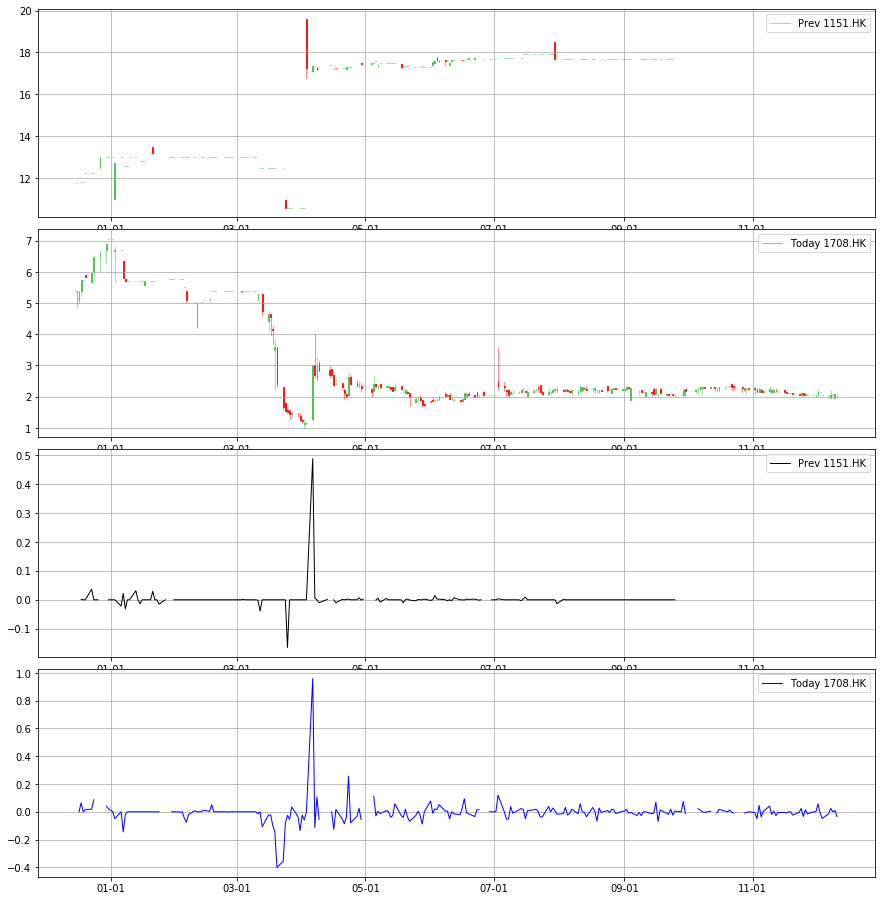

In [30]:
stock1 = '1151.HK.prev'
stock2 = '1708.HK'
#
print(comb_df[stock1].corr(comb_df[stock2]))
tools.plot_two_stocks(stock1, stock2, prevday_returns, today_returns, start)

### Grapth the top correlation pair

In [ ]:
stock1 = '6898.HK.prev'
stock2 = '8612.HK'
#
print(comb_df[stock1].corr(comb_df[stock2]))
plot_two_stocks(stock1, stock2, prevday_returns[stock1], today_returns[stock2])

### Upload to AWS S3

In [31]:
s3_bucket = 'slack-trading'
local_path = '../data'
tools.upload_data_to_s3(s3_bucket, local_path)